In [11]:
import qiskit
import random
from qiskit_aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [12]:
#Below is the number of qubits, which will be the same as the length of the secret string
n = 11

qr = qiskit.QuantumRegister(n-1, name = "Qubit")
aux = qiskit.QuantumRegister(1,name = "Aux")
cr = qiskit.ClassicalRegister(n-1, name = "Classical")
qc = qiskit.QuantumCircuit(qr,aux,cr)

### Note:
In this specific implementation of the oracle (BlackBox) of the bernstein-Vazerani circuit, the auxiliary qubit is not necessary. But i chose to keep it because its essential for the theoratical analysis of the circuit also since there is another ways to implement the bernstein-Vazerani circuit using CNOT-gates where the auxiliary qubit is assigned as the target qubit.

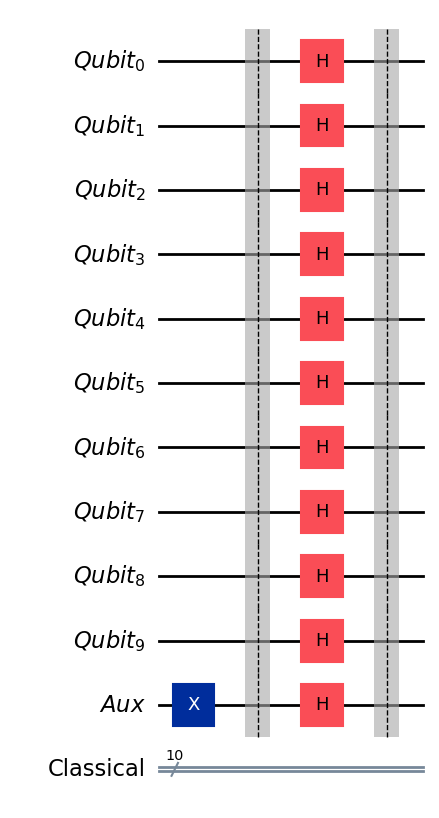

In [13]:
qc.x(aux)
qc.barrier()

for i in range(n-1):
    qc.h(qr[i])

qc.h(aux)
qc.barrier()
display(qc.draw('mpl'))

In [14]:
#Generating a random secret string
secret_string = ""
for i in range(n-1):
    bit = random.randint(0,1)
    secret_string += str(bit)

## Bernstein-Vazerani Oracle: (also known as Inner-Product Oracle)

In order to implement this specific oracle, its simply by looping over the secret_string bits and applying the below logic:

Oracle^i = (1 - secret_string_i)*Identity_gate + secret_string_i Z_gate

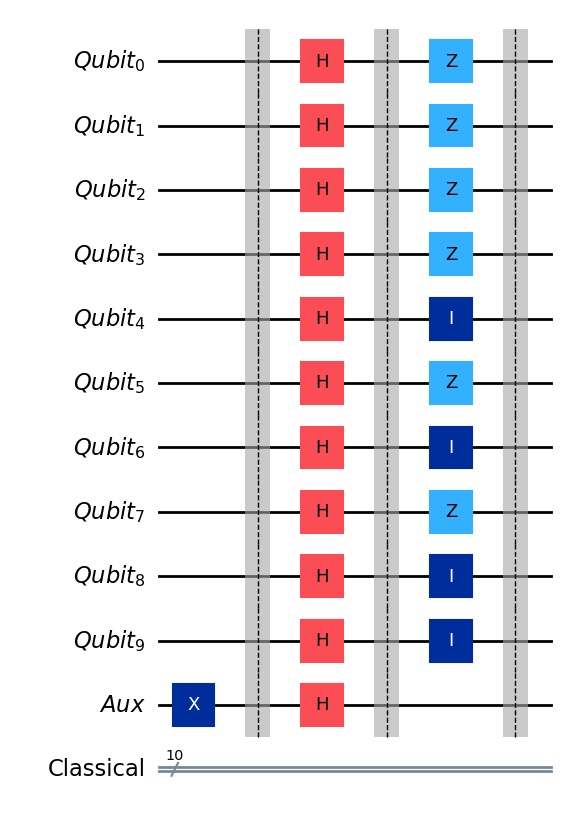

In [15]:
# Building the Inner-Product Oracle:
for index in range(0,n-1):
    t_index = int(secret_string[index])
    if t_index == 1:
        qc.z(qr[index])
    elif t_index == 0:
        qc.id(qr[index])

qc.barrier()
display(qc.draw('mpl'))

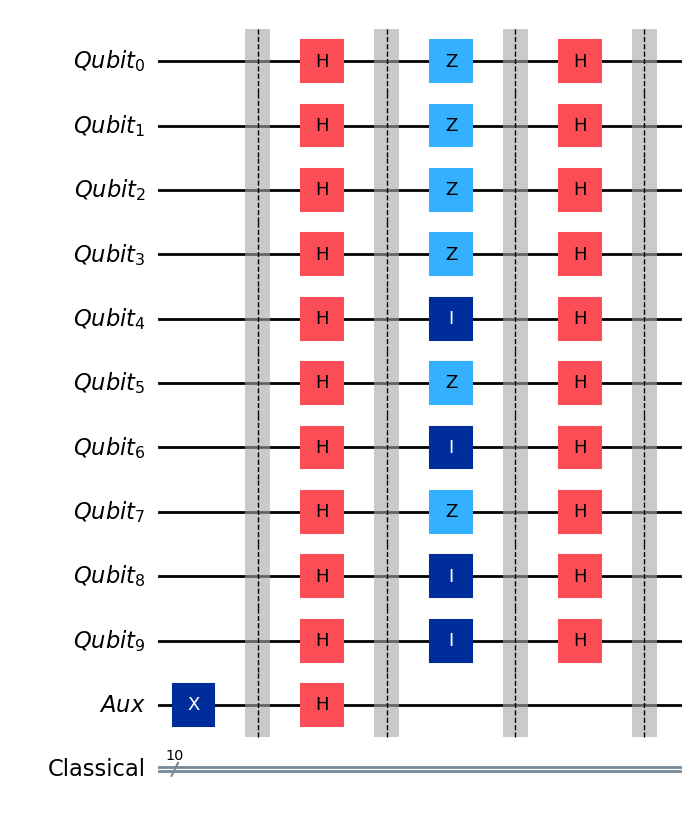

In [16]:
#for i in reversed(range(n-1)):
for i in range(n-1):
    qc.h(qr[i])

qc.barrier()
display(qc.draw('mpl'))

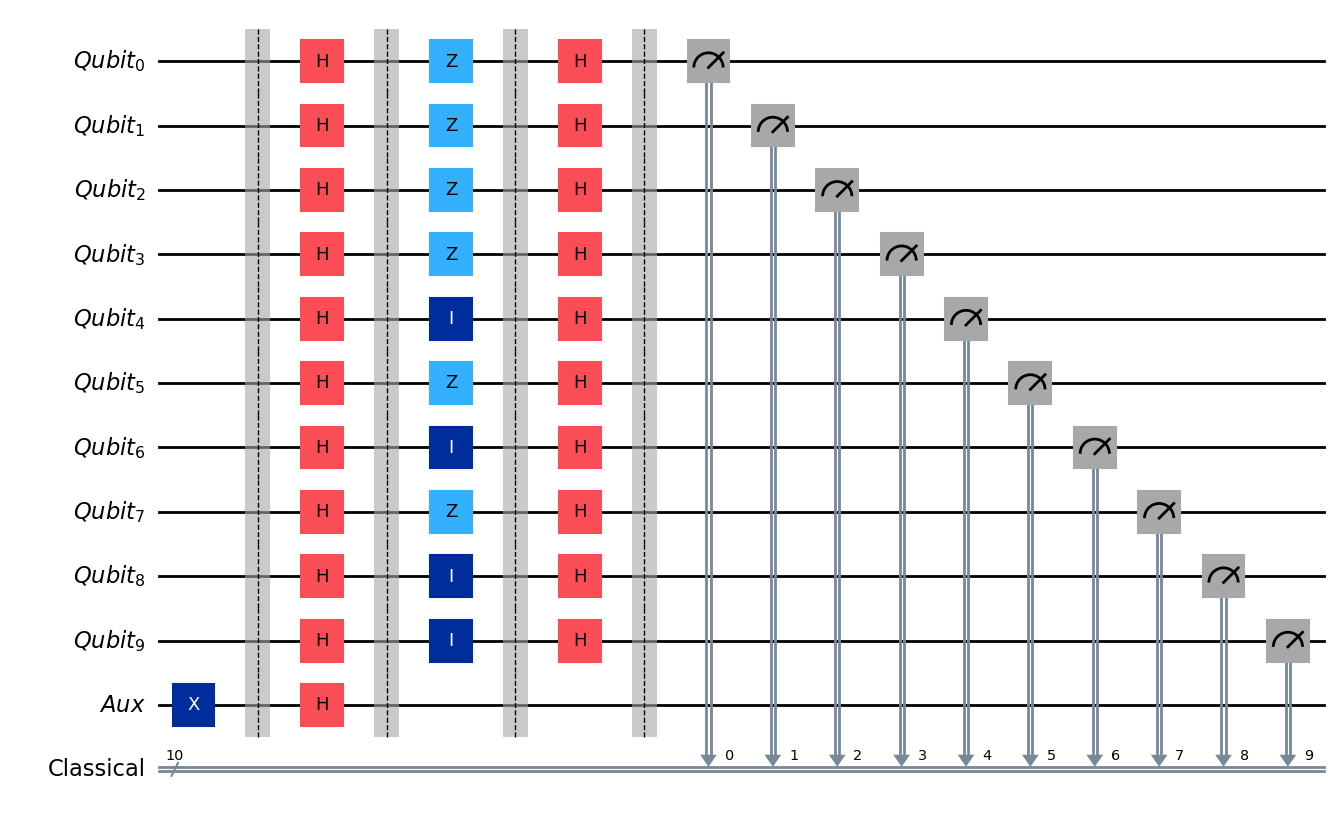

In [17]:
qc.measure(qr,cr)
display(qc.draw('mpl'))

{'0010101111': 2500}


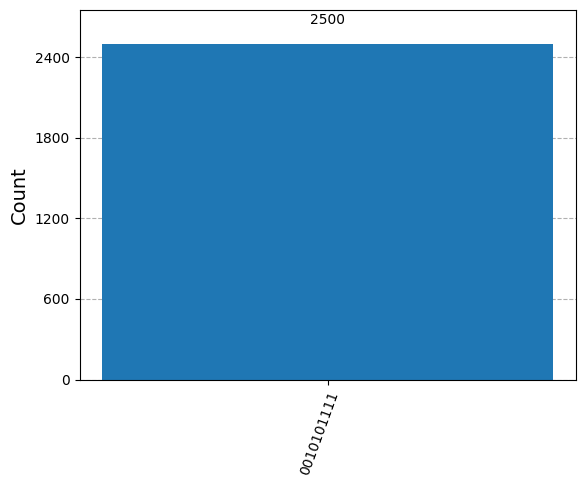

In [18]:
backend = QasmSimulator()
program_ = qiskit.transpile(qc, backend)
job = backend.run(program_,shots= 2500)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [19]:
#Validating the output of the quantum circuit with the secret string value
print(secret_string[::-1])

0010101111
